In [1]:
import sys
sys.path.append("../")

import pandas as pd
import tensorflow as tf
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import dataloader
import features

%matplotlib inline

## Sample audio

In [2]:
valid_loader = dataloader.DataLoader(drum_list_path='../dataset/audio_list.csv', label_path='../dataset/labels.pkl', batch_size=1, is_training=False)

Feature data file exists. Use existing ones..
Loading data file mfcc.pkl ...
Loading is done. Took 0.003007650375366211 seconds.
Feature data file exists. Use existing ones..
Loading data file melspectrogram.pkl ...
Loading is done. Took 0.002007722854614258 seconds.
Feature data file exists. Use existing ones..
Loading data file rmse.pkl ...
Loading is done. Took 0.002003908157348633 seconds.


In [3]:
features, labels, titles = valid_loader.next_batch()

In [4]:
features.shape

(1, 8, 1600, 13)

In [5]:
feature = np.squeeze(features)

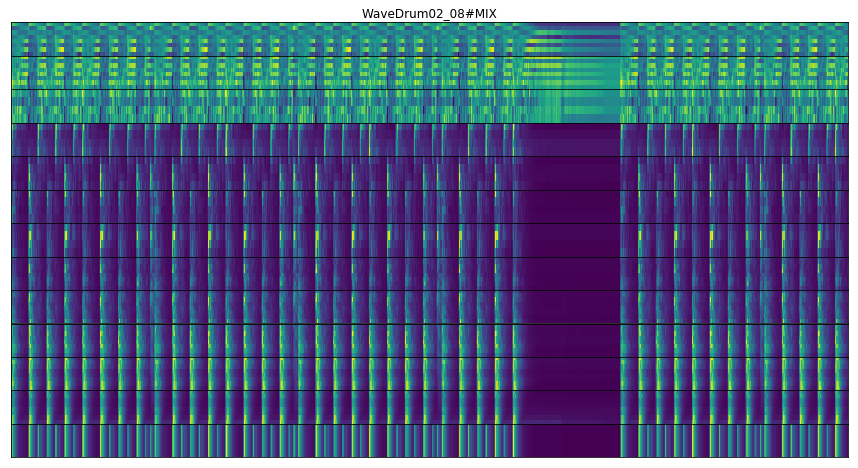

In [6]:
fig, axes = plt.subplots(13, 1, figsize=(15, 8))
fig.subplots_adjust(hspace =.001, wspace=.001)

axs = axes.ravel()
for i in range(13):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].imshow(feature[:, :,i], aspect='auto')
axs[0].set_title(titles[0])
plt.show()

In [7]:
feature = np.concatenate([feature[:,:,i] for i in range(13)], axis=0)

In [8]:
feature.shape

(104, 1600)

Same

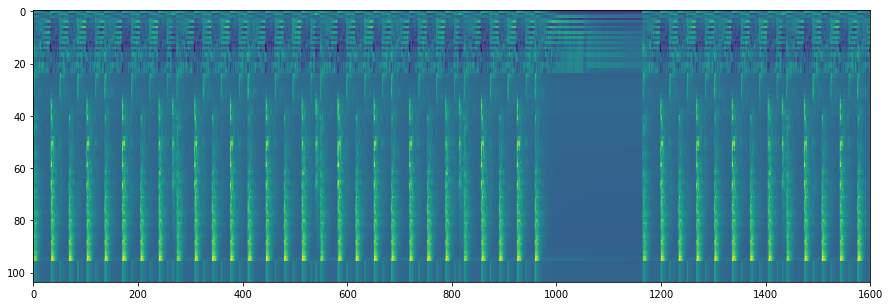

In [9]:
plt.figure(figsize=(15, 5))
plt.imshow(feature, aspect='auto')

In [10]:
mfcc = pd.DataFrame({"mfcc": feature[:24].ravel()})
mel = pd.DataFrame({"mel": feature[24:96].ravel()})
rmse = pd.DataFrame({"rmse": feature[96:].ravel()})
summary_stat = pd.concat([mfcc.describe(), mel.describe(), rmse.describe()], axis=1)
summary_stat

,mfcc,mel,rmse
count,38400.000000,115200.000000,12800.000000
mean,-0.056608,0.157454,-0.075731
std,0.881123,0.909505,0.520436
min,-3.528990,-0.822653,-0.659845
25%,-0.666764,-0.440162,-0.472862
50%,-0.099668,-0.163724,-0.238885
75%,0.523902,0.387561,0.236093
max,3.269392,5.464477,1.634521


Line by line

In [11]:
summary_stat_line = pd.concat([pd.DataFrame({"line_{}".format(i): feature[i]}).describe() for i in range(feature.shape[0])],
                              axis=1)
summary_stat_line

,line_0,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8,line_9,...,line_94,line_95,line_96,line_97,line_98,line_99,line_100,line_101,line_102,line_103
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.345433,-0.099541,-0.017711,-0.218875,0.652100,-0.503597,0.602888,-0.698805,0.268268,-0.763163,...,0.694448,0.923939,-0.075731,-0.075731,-0.075731,-0.075731,-0.075731,-0.075731,-0.075731,-0.075731
std,1.062945,0.888555,0.413599,0.766703,0.873376,0.631512,1.139422,0.668310,0.994504,0.570117,...,1.737370,1.707593,0.520578,0.520578,0.520578,0.520578,0.520578,0.520578,0.520578,0.520578
min,-1.991451,-1.434630,-0.917184,-2.204901,-0.765313,-2.094359,-1.399983,-2.804482,-1.739782,-2.734694,...,-0.606630,-0.515628,-0.659845,-0.659845,-0.659845,-0.659845,-0.659845,-0.659845,-0.659845,-0.659845
25%,-0.310990,-0.914836,-0.330026,-0.630694,-0.089080,-1.024701,-0.379878,-1.172685,-0.602894,-1.141020,...,-0.463498,-0.133807,-0.472862,-0.472862,-0.472862,-0.472862,-0.472862,-0.472862,-0.472862,-0.472862
50%,0.498981,-0.184864,-0.041605,-0.116814,0.472018,-0.561022,0.327723,-0.832861,0.300626,-0.804397,...,-0.378811,-0.106222,-0.238885,-0.238885,-0.238885,-0.238885,-0.238885,-0.238885,-0.238885,-0.238885
75%,1.231728,0.735869,0.220782,0.383488,1.330850,-0.034411,1.617308,-0.221257,1.145283,-0.422610,...,1.519645,1.595915,0.236093,0.236093,0.236093,0.236093,0.236093,0.236093,0.236093,0.236093
max,1.905140,2.545417,1.673685,1.352097,2.671402,1.456584,3.269392,1.026581,2.157699,1.010514,...,5.223221,5.464477,1.634521,1.634521,1.634521,1.634521,1.634521,1.634521,1.634521,1.634521


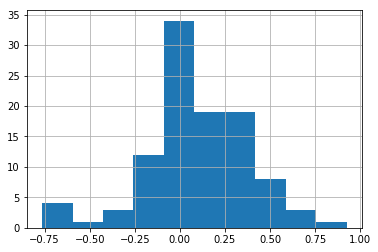

In [12]:
summary_stat_line.loc['mean'].hist()